## 例6-1. scikit-learnの数値データセット（MNISTの一部）に対する主成分分析

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

# データの読み込み
digits_data = datasets.load_digits()
n = len(digits_data.images)

In [2]:
# それぞれの画像は8 × 8の配列としてあらわされている。
# この配列をPCAへの入力とするために1次元へと倒す。
image_data = digits_data.images.reshape((n, -1))
image_data.shape

(1797, 64)

In [3]:
# 各画像の数値の正解ラベルを取得
labels = digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
# データセットに対してPCAを適用する
# 主成分の数は、少なくとも全体の分散の80%が説明できる水準となるよう自動的に選ばれる
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [5]:
pca_transformer.explained_variance_ratio_[:3].sum()

0.40303958587675076

<IPython.core.display.Javascript object>


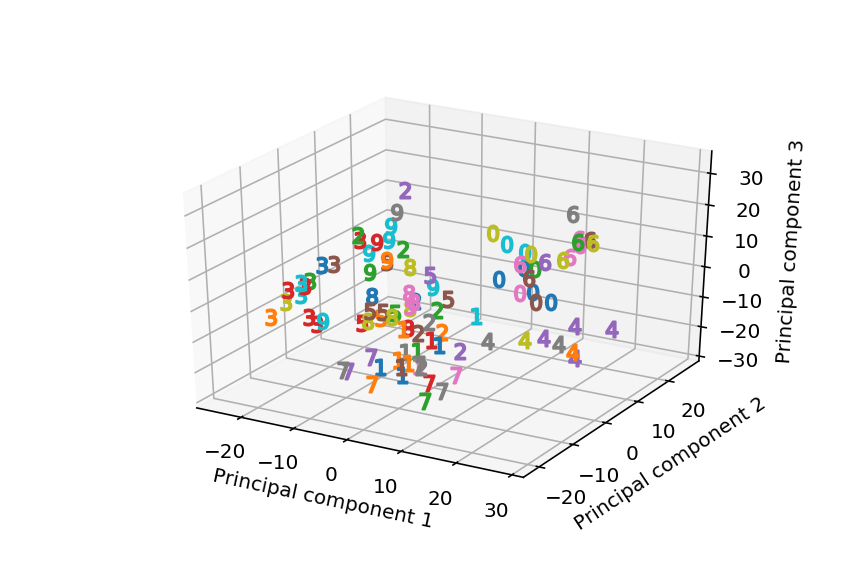

Text(0.5, 0, 'Principal component 3')

In [7]:
# 結果を可視化する
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], pca_images[i,2],
    marker=r'${}$'.format(labels[i]), s=64)

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')